# Exploration des données et features

## **Importations des données et connection au Drive**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
x_train = pd.read_csv('/content/drive/My Drive/Projet ML/x_train.csv', index_col='ID')
y_train = pd.read_csv('/content/drive/My Drive/Projet ML/y_train.csv', index_col='ID')


In [ ]:
x_train.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,RET_6,VOLUME_6,RET_7,VOLUME_7,RET_8,VOLUME_8,RET_9,VOLUME_9,RET_10,VOLUME_10,RET_11,VOLUME_11,RET_12,VOLUME_12,RET_13,VOLUME_13,RET_14,VOLUME_14,RET_15,VOLUME_15,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,0.010972,0.033832,-0.014672,-0.362868,0.016483,-0.972920,0.014331,0.590810,-0.017215,0.557246,-0.018433,0.453590,0.134146,8.580442,0.182287,3.427303,0.013570,-0.328418,0.030108,-0.816436,0.027624,-0.244636,-0.049370,-2.042624,-0.028571,-0.369605,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,0.018826,NaN,-0.025540,NaN,-0.038062,NaN,-0.006873,NaN,-0.026756,NaN,0.023973,NaN,0.158731,NaN,0.045642,NaN,-0.008230,NaN,-0.028000,NaN,-0.019608,NaN,-0.052044,NaN,-0.004073,NaN,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,-0.009042,-0.298777,0.024852,-0.157421,0.009354,0.091455,0.027522,-0.405978,-0.023047,-0.389777,-0.002979,-0.701838,-0.006342,-0.229531,0.055803,0.543460,-0.012781,-0.121126,0.028093,-0.187444,-0.009426,-0.081783,-0.002686,-0.356711,-0.007552,-0.336773,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,-0.004632,-0.639737,-0.019677,-0.940163,0.003544,-0.882464,-0.002021,-0.113951,-0.043962,-0.395345,-0.004329,-0.765754,0.014146,-0.593888,-0.021946,0.588171,0.007693,-0.427358,0.007264,-0.540519,-0.010067,-0.839232,0.000479,-2.144763,0.021057,-0.431029,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,0.000000,-1.180629,0.000000,-1.313896,0.022321,-1.204398,0.018182,-0.879172,-0.026549,-0.858613,-0.017391,-0.029690,-0.008621,-1.022991,0.022026,-0.387114,-0.008734,-0.288180,-0.004348,-0.115091,-0.041667,0.271702,0.095891,18.894266,-0.026667,0.803608,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806


## **Analyse des données**

In [ ]:
#x_train.sort_values(by='DATE')
x_train[x_train['DATE']==0]

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,RET_6,VOLUME_6,RET_7,VOLUME_7,RET_8,VOLUME_8,RET_9,VOLUME_9,RET_10,VOLUME_10,RET_11,VOLUME_11,RET_12,VOLUME_12,RET_13,VOLUME_13,RET_14,VOLUME_14,RET_15,VOLUME_15,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,0.010972,0.033832,-0.014672,-0.362868,0.016483,-0.972920,0.014331,0.590810,-0.017215,0.557246,-0.018433,0.453590,0.134146,8.580442,0.182287,3.427303,0.013570,-0.328418,0.030108,-0.816436,0.027624,-0.244636,-0.049370,-2.042624,-0.028571,-0.369605,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,0.018826,NaN,-0.025540,NaN,-0.038062,NaN,-0.006873,NaN,-0.026756,NaN,0.023973,NaN,0.158731,NaN,0.045642,NaN,-0.008230,NaN,-0.028000,NaN,-0.019608,NaN,-0.052044,NaN,-0.004073,NaN,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,-0.009042,-0.298777,0.024852,-0.157421,0.009354,0.091455,0.027522,-0.405978,-0.023047,-0.389777,-0.002979,-0.701838,-0.006342,-0.229531,0.055803,0.543460,-0.012781,-0.121126,0.028093,-0.187444,-0.009426,-0.081783,-0.002686,-0.356711,-0.007552,-0.336773,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,-0.004632,-0.639737,-0.019677,-0.940163,0.003544,-0.882464,-0.002021,-0.113951,-0.043962,-0.395345,-0.004329,-0.765754,0.014146,-0.593888,-0.021946,0.588171,0.007693,-0.427358,0.007264,-0.540519,-0.010067,-0.839232,0.000479,-2.144763,0.021057,-0.431029,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,0.000000,-1.180629,0.000000,-1.313896,0.022321,-1.204398,0.018182,-0.879172,-0.026549,-0.858613,-0.017391,-0.029690,-0.008621,-1.022991,0.022026,-0.387114,-0.008734,-0.288180,-0.004348,-0.115091,-0.041667,0.271702,0.095891,18.894266,-0.026667,0.803608,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806
5,0,23,37,12,5,94,0.010938,-0.238878,0.021548,-0.322706,-0.016097,0.747003,-0.027120,0.688104,-0.007958,-0.182443,-0.012719,0.014338,-0.002612,-0.424833,-0.042515,1.054858,-0.002851,-0.510536,0.027829,-0.304632,-0.004011,-0.053529,0.010316,-0.187437,0.005186,-0.638832,0.005587,0.437913,-0.002601,0.078789,0.025915,-0.062753,-0.004552,-0.097196,0.012677,-0.331521,0.032527,0.665084,0.008400,-0.037627
6,0,45,52,18,7,121,0.010602,-0.139011,-0.015338,-0.242468,-0.014900,-0.262839,-0.004804,-0.327501,0.002512,-0.185445,0.007383,-0.057506,-0.020859,-0.039475,-0.013045,-0.202530,0.011338,0.346935,0.016768,-0.391000,-0.006249,-0.195913,0.007978,-0.337275,0.007190,-0.235200,-0.004630,-0.943145,-0.009796,-0.254915,0.007983,-0.273181,-0.003767,0.296727,0.022470,0.158390,-0.005110,-0.219619,0.006428,-0.189815
7,0,59,57,20,8,143,0.001608,0.351362,-0.040863,-0.274854,-0.005444,-0.389846,0.000077,-0.469694,-0.007610,-0.263894,-0.006052,-0.288954,-0.009737,-0.266348,0.002252,-0.754402,0.009091,-0.468525,0.006097,-0.645362,0.021807,-0.170219,-0.003106,0.020632,-0.011512,-0.362547,0.000000,0.530099,0.005401,-0.430796,0.016471,0.008281,0.043372,-0.085970,-0.012924,-0.256353,-0.034321,-0.348341,0.011839,-0.811403
8,0,60,46,16,7,108,0.022012,NaN,-0.018519,NaN,0.023159,NaN,0.005290,NaN,0.000000,NaN,0.021621,NaN,0.000000,NaN,0.002167,NaN,-0.023280,NaN,-0.020725,NaN,-0.015307,NaN,0.005129,NaN,0.023085,NaN,0.030270,NaN,0.000000,NaN,-0.003232,NaN,0.019781,NaN,-0.028816,NaN,0.000000,NaN,0.007527,-0.333896


**Number industry** : 74 

**Number industry_group** : 26

**Number sector** : 11

**Number sub_industry** : 182

**DATE **: Random et anonymisé : aucun lien entre les dates etc, on peut retirer cette colonne

**STOCK** : les indexs semblent être liés à la sub_industry.


## **Choix des attributs/features**

In [ ]:
n_days = 20
selected_features = ['SUB_INDUSTRY']
selected_features += ['RET_%d' % (i + 1) for i in range(n_days)]
selected_features += ['VOLUME_%d' % (i + 1) for i in range(n_days)]

x_train[selected_features].head()

,SUB_INDUSTRY,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,VOLUME_6,VOLUME_7,VOLUME_8,VOLUME_9,VOLUME_10,VOLUME_11,VOLUME_12,VOLUME_13,VOLUME_14,VOLUME_15,VOLUME_16,VOLUME_17,VOLUME_18,VOLUME_19,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44,-0.015748,-0.015504,0.010972,-0.014672,0.016483,0.014331,-0.017215,-0.018433,0.134146,0.182287,0.013570,0.030108,0.027624,-0.049370,-0.028571,0.059459,0.003254,0.008752,-0.012959,-0.002155,0.147931,0.179183,0.033832,-0.362868,-0.972920,0.590810,0.557246,0.453590,8.580442,3.427303,-0.328418,-0.816436,-0.244636,-2.042624,-0.369605,0.630899,-0.379412,-0.110597,0.174521,-0.000937
1,104,0.003984,-0.090580,0.018826,-0.025540,-0.038062,-0.006873,-0.026756,0.023973,0.158731,0.045642,-0.008230,-0.028000,-0.019608,-0.052044,-0.004073,0.015413,0.003774,-0.018518,-0.028777,-0.034722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,142,0.000440,-0.058896,-0.009042,0.024852,0.009354,0.027522,-0.023047,-0.002979,-0.006342,0.055803,-0.012781,0.028093,-0.009426,-0.002686,-0.007552,0.008964,-0.017612,-0.006562,-0.012101,-0.006867,-0.096282,0.084771,-0.298777,-0.157421,0.091455,-0.405978,-0.389777,-0.701838,-0.229531,0.543460,-0.121126,-0.187444,-0.081783,-0.356711,-0.336773,-0.010336,-0.354333,-0.519391,-0.356157,-0.308868
3,2,0.031298,0.007756,-0.004632,-0.019677,0.003544,-0.002021,-0.043962,-0.004329,0.014146,-0.021946,0.007693,0.007264,-0.010067,0.000479,0.021057,-0.031769,0.033824,-0.001468,-0.013520,-0.036745,-0.429540,-0.089919,-0.639737,-0.940163,-0.882464,-0.113951,-0.395345,-0.765754,-0.593888,0.588171,-0.427358,-0.540519,-0.839232,-2.144763,-0.431029,0.012105,-0.290178,-0.663834,-0.562126,-0.631458
4,92,0.027273,-0.039302,0.000000,0.000000,0.022321,0.018182,-0.026549,-0.017391,-0.008621,0.022026,-0.008734,-0.004348,-0.041667,0.095891,-0.026667,-0.038461,-0.012659,0.004237,0.004256,-0.040817,-0.847155,-0.943033,-1.180629,-1.313896,-1.204398,-0.879172,-0.858613,-0.029690,-1.022991,-0.387114,-0.288180,-0.115091,0.271702,18.894266,0.803608,-0.277083,0.139086,-0.017547,0.579510,0.802806


In [ ]:
df = x_train[selected_features]


In [ ]:
# Création d'un dataframe pour un sub_industry = choix_SI

def choice_SI(id):
  """ retourne l'ensemble des lignes d'une sous-industries"""
  
  choix_SI = id
  df_SUB_IND = df.loc[df['SUB_INDUSTRY'] == choix_SI]

  #Réorganisation de l'index
  df_SUB_IND = df_SUB_IND.reset_index(drop=True)
  return df_SUB_IND

df_SUB_IND_2 = choice_SI(3)
df_SUB_IND_2.tail()


,SUB_INDUSTRY,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,VOLUME_6,VOLUME_7,VOLUME_8,VOLUME_9,VOLUME_10,VOLUME_11,VOLUME_12,VOLUME_13,VOLUME_14,VOLUME_15,VOLUME_16,VOLUME_17,VOLUME_18,VOLUME_19,VOLUME_20
935,3,0.003893,-0.016171,0.012931,0.006945,-0.003460,-0.007726,-0.002996,-0.013924,-0.012088,0.009256,-0.015735,-0.009840,0.017522,-0.002912,0.006701,0.014444,0.003410,0.009031,0.003020,-0.014455,-0.245982,-0.136226,-0.234649,-0.503789,-0.392426,0.259810,-0.211946,-0.261805,-0.593922,-0.590189,-0.590032,-0.529719,-0.565197,-0.093629,-0.374756,-0.298801,-0.521445,0.050221,0.337952,-0.392882
936,3,0.008661,-0.008277,0.001721,0.005664,-0.008115,-0.001869,0.000000,-0.003106,-0.008315,0.008385,-0.010449,-0.006260,0.012993,-0.009195,0.000767,-0.009118,-0.003332,0.016005,-0.015455,0.003040,-0.495448,-0.344644,-0.368957,-0.404625,-0.225749,-0.534671,-0.311133,-0.309605,-0.177920,-0.321498,-0.234774,-0.671925,-0.530782,-0.209115,-0.277399,-0.129090,-0.135701,-0.181060,-0.197130,-0.102691
937,3,0.009455,-0.008592,-0.001754,0.004504,0.001372,0.001965,-0.006829,-0.009279,-0.016540,0.005544,-0.019494,-0.012403,0.007836,0.000186,0.017854,0.015038,-0.002883,0.018403,-0.011036,-0.008256,-0.419476,-0.572051,-0.304940,-0.361501,-0.360711,-0.203630,-0.185794,-0.302049,-0.032019,-0.123739,-0.154636,0.165339,-0.386931,-0.249639,-0.050803,-0.111532,-0.402211,-0.446967,-0.263552,-0.661037
938,3,0.017464,0.004617,-0.010959,0.008751,-0.007316,0.019105,0.002804,-0.012004,-0.018132,0.006157,-0.016375,-0.006684,0.016074,-0.023651,0.010046,0.015186,0.002272,0.018746,-0.000231,-0.023056,-0.665946,-0.409462,-0.371898,-0.230772,-0.369640,-0.150818,-0.247932,-0.433099,-0.277223,-0.635183,-0.609432,-0.373260,-0.408685,-0.575902,0.460387,-0.358209,-0.191689,-0.385200,-0.059211,-0.566666
939,3,0.018006,-0.005373,0.011320,0.008448,-0.004998,0.005252,-0.008153,-0.021064,-0.004195,0.004213,-0.007483,-0.004164,0.030953,-0.014693,0.006498,0.009957,-0.000226,0.010055,-0.011074,-0.000903,-0.443595,-0.605912,-0.154240,-0.636431,-0.471862,-0.625211,-0.132058,-0.253528,-0.520412,-0.486476,-0.492277,-0.723184,-0.188963,-0.570611,-0.288290,-0.080311,-0.192969,-0.108678,-0.025002,-0.285339


In [ ]:
days = 20
ret_list = ['RET_%d' % (i + 1) for i in range(days)]

df_SUB_IND_2[ret_list].head()


,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20
0,0.019318,0.008019,-0.007672,-0.003117,-0.008427,0.002817,-0.010039,0.005890,-0.011095,-0.000278,-0.006064,0.002764,0.007519,-0.012648,-0.008992,0.001091,-0.006504,-0.001083,0.001355,0.000271
1,0.033387,0.010280,-0.022912,-0.022400,-0.023374,0.014286,-0.019374,0.002990,-0.007124,0.002678,-0.011764,0.009801,0.003577,0.002990,-0.006534,0.001189,0.008094,-0.009501,0.006274,-0.002087
2,0.021546,0.012466,-0.001167,-0.017208,-0.004568,0.004589,-0.020600,-0.000374,0.009830,-0.002640,-0.003008,0.003395,0.006072,0.004575,0.003059,-0.001146,0.001913,-0.013218,-0.013044,0.013600
3,0.017342,0.000560,0.001401,-0.011497,-0.011096,0.012904,-0.010027,-0.009119,0.002319,0.019046,-0.009910,0.002760,0.003463,-0.002487,-0.010932,-0.002997,-0.005555,0.002581,-0.002439,0.000949
4,0.018010,-0.002836,-0.001887,-0.011931,0.003555,0.010397,-0.005452,-0.003746,-0.010013,-0.012271,-0.008175,0.000363,0.004198,0.001645,0.002015,0.005895,-0.009670,-0.000911,0.001095,0.000913


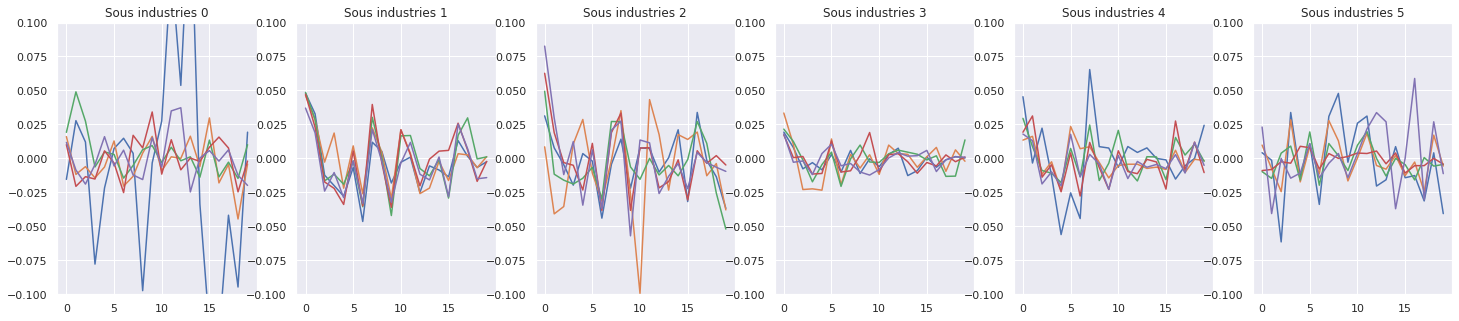

In [ ]:
import seaborn as sns
sns.set()

sous_industries = 6
id_sous_ind = 5

def affichage_SI(sous_industries, nbr_ligne_par_SI):
  fig, axs = plt.subplots(1,sous_industries, figsize=(25,5))
  for i in range(sous_industries):
    axs[i].set_ylim([-0.1, 0.1])  
    df_SUB_IND = choice_SI(i)
    df_SUB_IND = df_SUB_IND.reset_index(drop=True)
    for ii in range(nbr_ligne_par_SI):
      axs[i].plot(range(days), df_SUB_IND[ret_list].loc[ii,:])
      axs[i].set_title("Sous industries {}".format(i))

affichage_SI(sous_industries, id_sous_ind)



## **Regroupement des sous-industries par secteur**

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

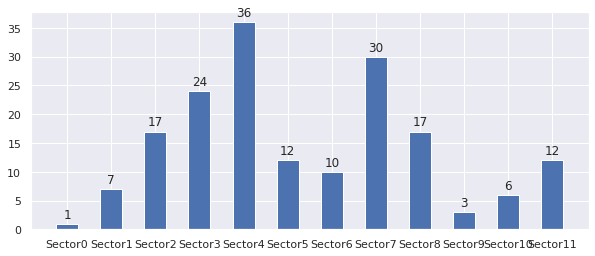

In [ ]:
def si_in_sector(id_sector):
  df_sector = x_train
  df_sector = df_sector.loc[df_sector['SECTOR'] == id_sector]
  list_sector_SI = df_sector['SUB_INDUSTRY'].unique()
  list_sector_SI.sort()
  nb_si = len(list_sector_SI) 
  return nb_si, list_sector_SI


list_si = []
list_nom_si = []
for i in range(12):
  nb_si, list_SI_sector = si_in_sector(i)
  list_si.append(nb_si)
  list_nom_si.append("Sector{}".format(i))
  #ax = plt.bar(i,nb_si,align='center')

fig, ax = plt.subplots(figsize = (10,4))
ax.bar(range(12),list_si,align='center', width=0.5)
ax.set_xticks(range(12))
ax.set_xticklabels(list_nom_si)
for i in range(12): 
  ax.annotate(
      list_si[i],                      # Use `label` as label
      (i, list_si[i]+1),         # Place label at end of the bar        
      ha='center')                # Horizontally center label   

n4, l4 = si_in_sector(2)
l4
  
  


## **Exploration d'un secteur par ces sous-industries**


,SUB_INDUSTRY,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,VOLUME_6,VOLUME_7,VOLUME_8,VOLUME_9,VOLUME_10,VOLUME_11,VOLUME_12,VOLUME_13,VOLUME_14,VOLUME_15,VOLUME_16,VOLUME_17,VOLUME_18,VOLUME_19,VOLUME_20
0,25,0.007273,-0.009009,-0.004662,-0.016232,0.028676,0.003278,-0.020336,0.007911,-0.008910,0.032757,-0.023364,0.030370,0.005587,0.005995,-0.020551,0.000735,-0.013406,0.015453,-0.044975,0.014617,0.533235,-0.349252,-0.474445,-0.233087,0.027819,-0.454119,-0.436926,-0.580885,-0.221674,-0.472435,-0.128703,-0.334253,-0.415924,-0.882963,-0.257803,-0.167287,-0.460288,-0.236325,-0.149663,-0.302245
1,25,0.036440,0.002595,0.016025,0.013361,-0.014783,0.015005,0.015870,-0.002915,-0.001040,-0.006612,-0.008400,0.007430,0.018499,0.001052,-0.006897,-0.005611,-0.007016,0.005185,-0.008636,-0.010781,0.408243,0.047220,0.121412,0.007613,-0.276181,0.345056,0.233914,-0.312854,0.645914,-0.136143,-0.151324,-0.532517,-0.608236,-1.004479,-0.215602,-0.431033,-0.581854,-0.407558,-0.280984,-0.036711
2,25,0.010308,0.021333,0.003754,-0.009912,-0.010354,0.022427,-0.011702,-0.017581,0.019300,0.015398,-0.006398,0.008557,0.006494,0.003258,0.004267,-0.004249,-0.007591,0.004661,-0.022637,0.007650,0.167647,0.347644,-0.340756,-0.121123,-0.320073,-0.151005,-0.343468,-0.454597,-0.195705,-0.381232,-0.061182,-0.440610,-0.093838,-0.801476,-0.042886,-0.125249,-0.263392,-0.275525,-0.090785,0.969022
3,25,0.005427,-0.006589,-0.001495,-0.032967,-0.017056,0.014126,-0.015328,0.006859,-0.000571,0.012435,-0.006322,0.004329,0.009615,0.002922,-0.005233,-0.000290,-0.002609,0.001161,-0.030116,0.000845,0.006655,-0.344514,-0.274541,1.023422,-0.142962,-0.467349,-0.681078,-0.632310,-0.673661,-0.521373,-0.166086,-0.525115,-0.301065,-0.592290,-0.589170,-0.578894,-0.621104,-0.329661,-0.132564,-0.106412
4,25,0.041017,-0.015228,0.047162,0.020267,-0.006710,-0.009764,-0.018501,-0.003581,0.022096,0.016115,-0.012245,0.000542,0.017656,-0.006032,-0.016319,0.004607,0.006272,-0.006502,-0.032499,0.034431,0.059379,-0.440709,0.943490,0.094841,-0.269200,0.091367,-0.215569,-0.551415,-0.433563,-0.603899,-0.174407,-0.597420,-0.627386,-0.692048,-0.133860,-0.597891,-0.172460,-0.426237,0.010056,0.327644


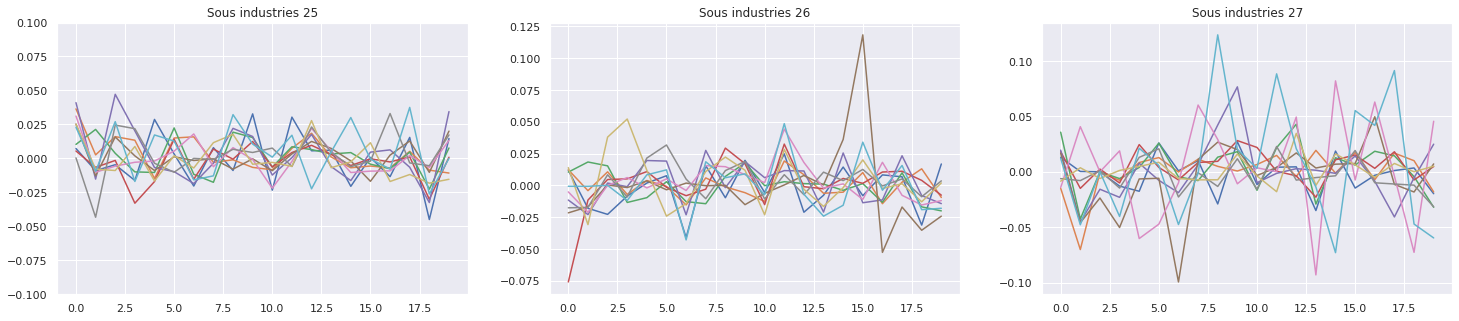

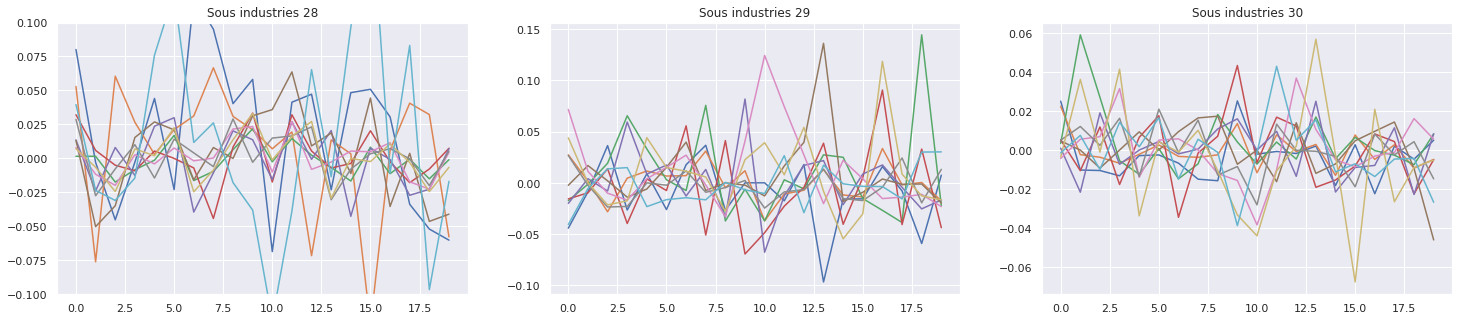

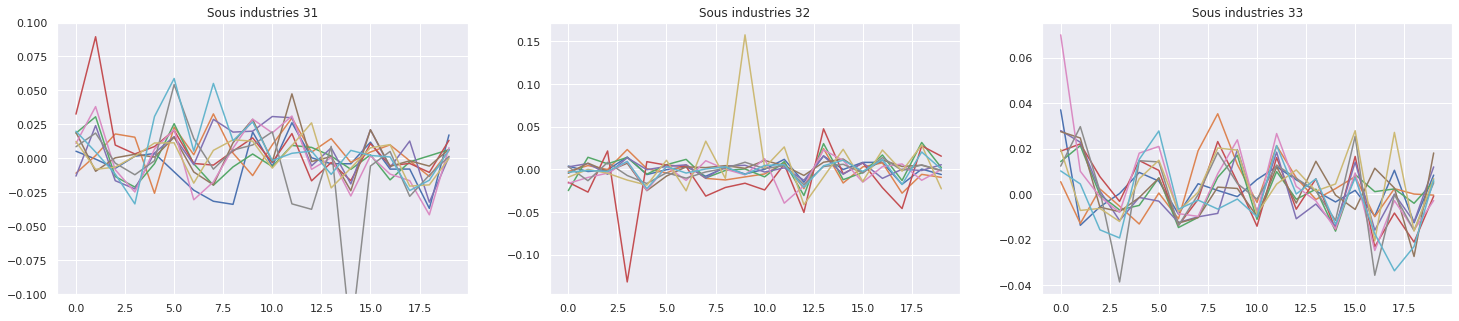

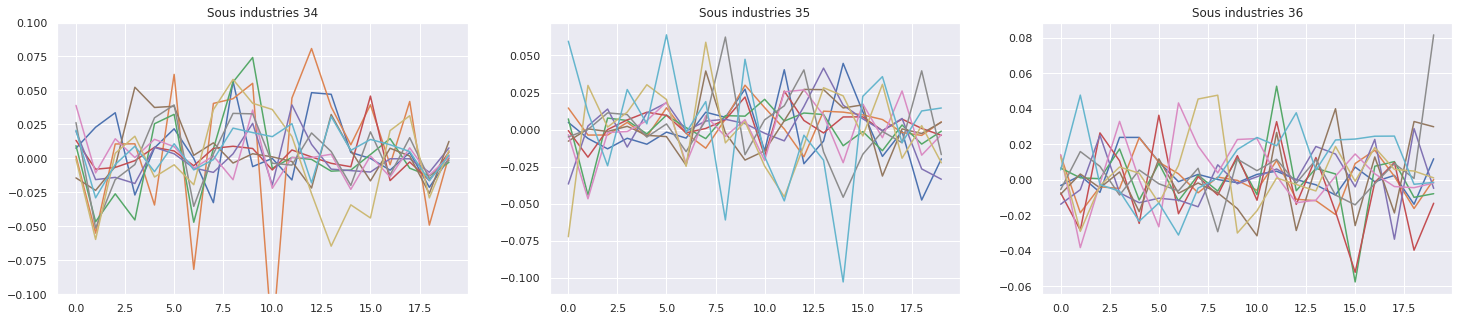

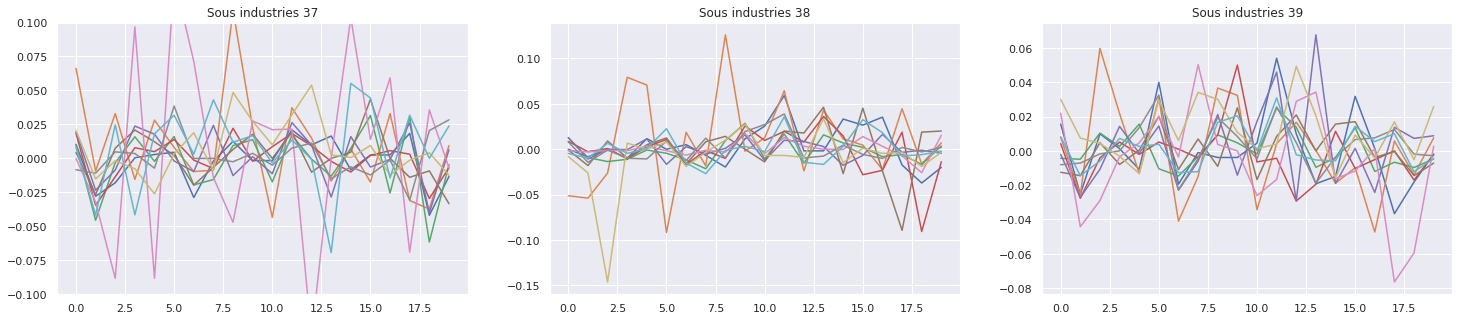

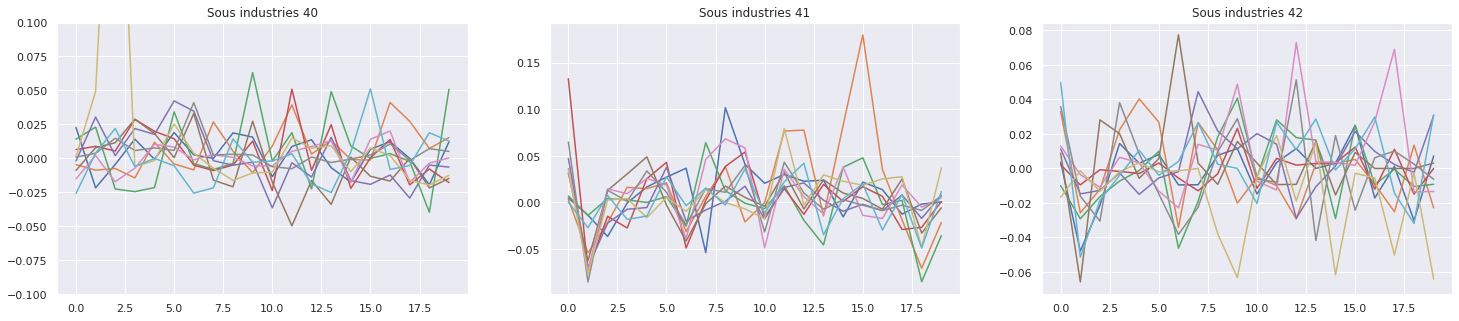

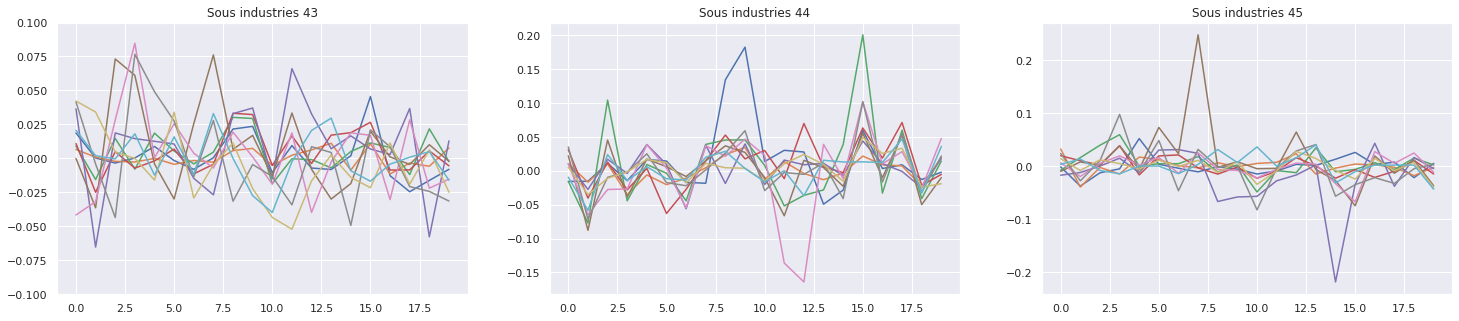

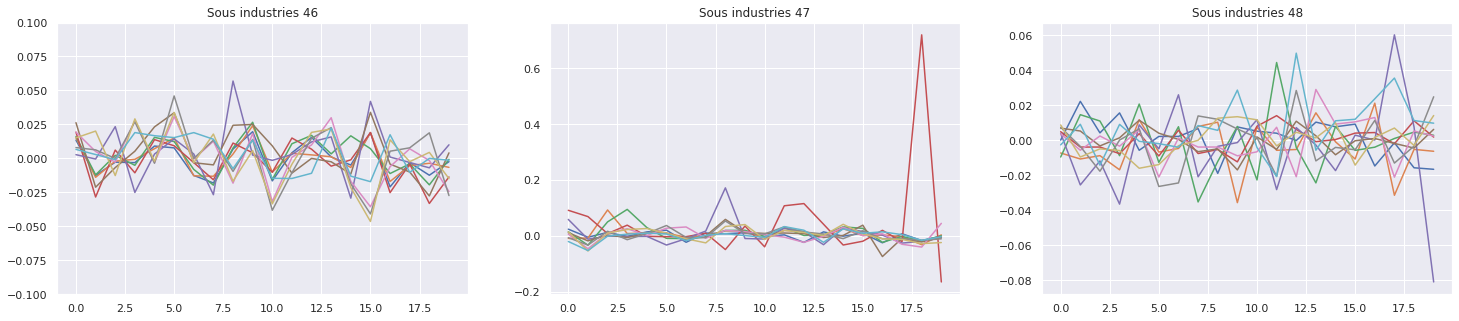

In [ ]:
# Exploration de sector 1
# Chaque plot affiche pour une sous-industries les variations qu'elle a vécu pour N dates sur 20 jours


def affichage_SI2(sous_industries, nbr_ligne_par_SI, nb_ind):
  fig, axs = plt.subplots(1,3, figsize=(25,5),squeeze=False)
  axs[0,0].set_ylim([-0.1, 0.1])  
  for i in range(3):
    if (sous_industries + i <= nb_ind):
      df_SUB_IND = choice_SI(sous_industries+i)
      df_SUB_IND = df_SUB_IND.reset_index(drop=True)
      for ii in range(nbr_ligne_par_SI):
        axs[0,i].plot(range(days), df_SUB_IND[ret_list].loc[ii,:])
        axs[0,i].set_title("Sous industries {}".format(sous_industries+i))
    else:
      return 0

def explo_secteur(exp_sec, len_tot, df_ALLSI_SEC):
  #Récupération de toutes les sous-industries pour le secteur : exp_sec. 
  n4, l4 = si_in_sector(exp_sec)
  #Récupération des données de chacune de ces sous-industries
  df_ALLSI_SEC = None
  len_tot = 0

  for n in l4:
    len_tot += len(choice_SI(n))
    df_ALLSI_SEC = pd.concat([df_ALLSI_SEC, choice_SI(n)])

  for n in range(l4[0], l4[-1], 3):
    affichage_SI2(n, 10, l4[0]+len(l4)-1) 

  df_ALLSI_SEC = df_ALLSI_SEC.reset_index(drop=True) 

  return len_tot, df_ALLSI_SEC

exp_sec = 3
len_tot, df_ALLSI_SEC = explo_secteur(exp_sec, len_tot, df_ALLSI_SEC)
df_ALLSI_SEC.head()



In [ ]:
df_ALLSI_SEC.head()

,SUB_INDUSTRY,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,VOLUME_6,VOLUME_7,VOLUME_8,VOLUME_9,VOLUME_10,VOLUME_11,VOLUME_12,VOLUME_13,VOLUME_14,VOLUME_15,VOLUME_16,VOLUME_17,VOLUME_18,VOLUME_19,VOLUME_20
0,25,0.007273,-0.009009,-0.004662,-0.016232,0.028676,0.003278,-0.020336,0.007911,-0.008910,0.032757,-0.023364,0.030370,0.005587,0.005995,-0.020551,0.000735,-0.013406,0.015453,-0.044975,0.014617,0.533235,-0.349252,-0.474445,-0.233087,0.027819,-0.454119,-0.436926,-0.580885,-0.221674,-0.472435,-0.128703,-0.334253,-0.415924,-0.882963,-0.257803,-0.167287,-0.460288,-0.236325,-0.149663,-0.302245
1,25,0.036440,0.002595,0.016025,0.013361,-0.014783,0.015005,0.015870,-0.002915,-0.001040,-0.006612,-0.008400,0.007430,0.018499,0.001052,-0.006897,-0.005611,-0.007016,0.005185,-0.008636,-0.010781,0.408243,0.047220,0.121412,0.007613,-0.276181,0.345056,0.233914,-0.312854,0.645914,-0.136143,-0.151324,-0.532517,-0.608236,-1.004479,-0.215602,-0.431033,-0.581854,-0.407558,-0.280984,-0.036711
2,25,0.010308,0.021333,0.003754,-0.009912,-0.010354,0.022427,-0.011702,-0.017581,0.019300,0.015398,-0.006398,0.008557,0.006494,0.003258,0.004267,-0.004249,-0.007591,0.004661,-0.022637,0.007650,0.167647,0.347644,-0.340756,-0.121123,-0.320073,-0.151005,-0.343468,-0.454597,-0.195705,-0.381232,-0.061182,-0.440610,-0.093838,-0.801476,-0.042886,-0.125249,-0.263392,-0.275525,-0.090785,0.969022
3,25,0.005427,-0.006589,-0.001495,-0.032967,-0.017056,0.014126,-0.015328,0.006859,-0.000571,0.012435,-0.006322,0.004329,0.009615,0.002922,-0.005233,-0.000290,-0.002609,0.001161,-0.030116,0.000845,0.006655,-0.344514,-0.274541,1.023422,-0.142962,-0.467349,-0.681078,-0.632310,-0.673661,-0.521373,-0.166086,-0.525115,-0.301065,-0.592290,-0.589170,-0.578894,-0.621104,-0.329661,-0.132564,-0.106412
4,25,0.041017,-0.015228,0.047162,0.020267,-0.006710,-0.009764,-0.018501,-0.003581,0.022096,0.016115,-0.012245,0.000542,0.017656,-0.006032,-0.016319,0.004607,0.006272,-0.006502,-0.032499,0.034431,0.059379,-0.440709,0.943490,0.094841,-0.269200,0.091367,-0.215569,-0.551415,-0.433563,-0.603899,-0.174407,-0.597420,-0.627386,-0.692048,-0.133860,-0.597891,-0.172460,-0.426237,0.010056,0.327644


In [ ]:
for i in range(20):
  print("MEAN RET {} : {}".format(i,df_ALLSI_SEC['RET_%d' % (i+1)].mean()))


Idées:
- Remplacer N/A avec moyenne du secteur à la même date.
- Utiliser LSTM vanilla


In [ ]:
x_train[x_train['DATE']==0]